In [1]:
from chp4_sur import SurnamesDataset, SurnamesVectorizer
import torch
from torch import nn
import torch.nn.functional as F
import pdb

In [2]:
filename = './data/data/names/full_dataset.csv'
dataset = SurnamesDataset.load_dataset_and_make_vectorizer(filename)

In [3]:
dataset.input_size()

86

In [4]:
dataset.output_size()

18

In [5]:
dataset.get_item(0)

Unnamed: 0       2441
surname        Sayegh
nationality    Arabic
split           train
Name: 0, dtype: object

In [6]:
dataset.head(2)

{'idx': 0, 'x_data': tensor([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'y_target': tensor([0])}
{'idx': 1, 'x_data': tensor([0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'y_target': tensor([1])}


In [7]:
class SurnamesMLP(nn.Module):
    def __init__(self, input_vocab_size, hidden_size, output_vocab_size):
        super(SurnamesMLP, self).__init__()
        self.fc1 = nn.Linear(input_vocab_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_vocab_size)
        
    def forward(self, input_vec, apply_softmax=True):
        hidden = F.relu(self.fc1(input_vec))
        output = self.fc2(hidden)
        if apply_softmax == True:
            output = torch.softmax(output, dim=1)
        return output

In [8]:
model = SurnamesMLP(dataset.input_size(), 10, dataset.output_size())

In [9]:
print(model)

SurnamesMLP(
  (fc1): Linear(in_features=86, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=18, bias=True)
)


In [10]:
x_data_from_dataset = next(iter(dataset))['x_data']
y_target_from_dataset = next(iter(dataset))['y_target']
x_data_from_dataset, y_target_from_dataset

(tensor([0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), tensor([0]))

In [11]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=4, 
                        drop_last=False, shuffle=True)

In [12]:
sample = next(iter(dataloader))
x_data = sample['x_data']
y_target = sample['y_target']
x_data, y_target

(tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [13]:
y_pred = model(x_data, apply_softmax=False)
print(y_pred)
print(y_target.view(-1))

tensor([[ 0.3019, -0.2006,  0.2824,  0.3119,  0.2956,  0.0100, -0.1395,  0.2424,
         -0.2681, -0.2305,  0.1721, -0.0869, -0.1734,  0.2923, -0.3103, -0.0373,
         -0.1127,  0.0471],
        [ 0.2553, -0.0876,  0.1538,  0.2243,  0.2423,  0.0252, -0.1251,  0.2008,
         -0.3281, -0.1914,  0.1393, -0.1206, -0.2979,  0.3356, -0.3766, -0.1521,
         -0.1491, -0.0566],
        [ 0.3503, -0.1461,  0.1797,  0.2774,  0.2793,  0.0210, -0.1106,  0.2323,
         -0.2821, -0.1579,  0.0865, -0.0712, -0.2495,  0.3214, -0.2993, -0.1021,
         -0.2034, -0.0445],
        [ 0.2801, -0.1908,  0.2382,  0.2819,  0.2721,  0.0358, -0.1513,  0.2410,
         -0.3041, -0.2390,  0.1719, -0.0605, -0.2241,  0.3007, -0.2855, -0.0246,
         -0.1517,  0.0461]], grad_fn=<ThAddmmBackward>)
tensor([ 1, 10,  7,  0])


In [14]:
ce_loss = nn.CrossEntropyLoss()

In [15]:
ce_loss(y_pred, y_target.view(-1))

tensor(2.8064, grad_fn=<NllLossBackward>)

In [16]:
# Manual check:
sf_mx = torch.softmax(y_pred, dim=1)
torch.mean(-torch.log(torch.tensor([sf_mx[i, val.item()] for i, val in enumerate(y_target)])))

tensor(2.8064)

In [17]:
from torch.optim import Adam
from tqdm import tqdm as tqdm

In [18]:
model = SurnamesMLP(dataset.input_size(), 300, dataset.output_size())
optim = Adam(params=model.parameters(), lr=0.001)

In [19]:
def run_batch(model, dataset, batch_type, batch_size):

    dataset.set_split(batch_type)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, 
                            drop_last=False, shuffle=True)

    running_loss = 0
    running_acc = 0

    if batch_type == 'train':
        model.train()
    else:
        model.eval()

    #for sample in tqdm(dataloader, desc='{:<{w}}'.format(batch_type, w=6)):
    for sample in dataloader:

        if model.training:
            model.zero_grad()

        x_data = sample['x_data']
        y_target = sample['y_target']

        y_pred = model(x_data)
        loss = ce_loss(y_pred, y_target.view(-1))

        _, idx = torch.topk(torch.softmax(y_pred, dim=1), 1)
        acc = sum(y_target == idx).float()

        if model.training:
            loss.backward()
            optim.step()

        running_loss += loss * x_data.shape[0]
        running_acc += acc

    running_loss /= len(dataset)
    running_acc /= len(dataset)
    
    return round(running_loss.item(),4), round(running_acc.item(),4)

In [20]:
num_epochs = 100
hist = []
for epoch in range(num_epochs):
    tr_loss, tr_acc = run_batch(model, dataset, 'train', 64)
    val_loss, val_acc = run_batch(model, dataset, 'val', 64)
    print('{} / {} :'.format(epoch+1, num_epochs), (tr_loss, tr_acc), (val_loss, val_acc))
    hist.append([tr_loss, tr_acc, val_loss, val_acc])

1 / 100 : (2.6586, 0.3994) (2.5192, 0.498)
2 / 100 : (2.495, 0.5051) (2.482, 0.5132)
3 / 100 : (2.4738, 0.521) (2.4726, 0.5166)
4 / 100 : (2.4632, 0.5293) (2.4645, 0.5259)
5 / 100 : (2.457, 0.5332) (2.4598, 0.5337)
6 / 100 : (2.4515, 0.5384) (2.456, 0.5337)
7 / 100 : (2.4472, 0.5415) (2.4522, 0.5366)
8 / 100 : (2.4436, 0.5453) (2.4503, 0.5366)
9 / 100 : (2.4399, 0.5489) (2.4489, 0.5366)
10 / 100 : (2.4364, 0.552) (2.4459, 0.539)
11 / 100 : (2.4334, 0.5544) (2.4439, 0.542)
12 / 100 : (2.4251, 0.5645) (2.4292, 0.561)
13 / 100 : (2.4069, 0.5855) (2.4164, 0.5698)
14 / 100 : (2.3973, 0.5934) (2.4112, 0.5751)
15 / 100 : (2.3914, 0.5989) (2.4065, 0.581)
16 / 100 : (2.3866, 0.6037) (2.4031, 0.581)
17 / 100 : (2.3808, 0.6089) (2.3993, 0.5859)
18 / 100 : (2.376, 0.6153) (2.3958, 0.5951)
19 / 100 : (2.3727, 0.6172) (2.3934, 0.5951)
20 / 100 : (2.3696, 0.6207) (2.3906, 0.598)
21 / 100 : (2.3661, 0.6232) (2.3884, 0.6005)
22 / 100 : (2.363, 0.6266) (2.3863, 0.601)
23 / 100 : (2.3605, 0.6294) (2.3851

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
hist = np.array(hist)

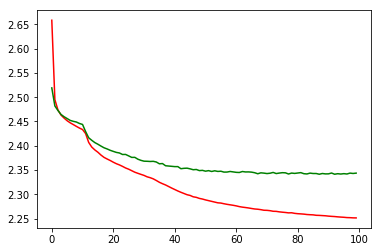

In [23]:
plt.plot(hist[:,0], 'r', hist[:,2], 'g')

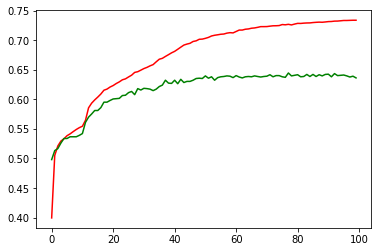

In [24]:
plt.plot(hist[:,1], 'r', hist[:,3], 'g')

In [25]:
run_batch(model, dataset, 'test', 64)

(2.3245, 0.6585)